## model evaluation

Finding best model and hyper parameter tunning using GridSearchCV

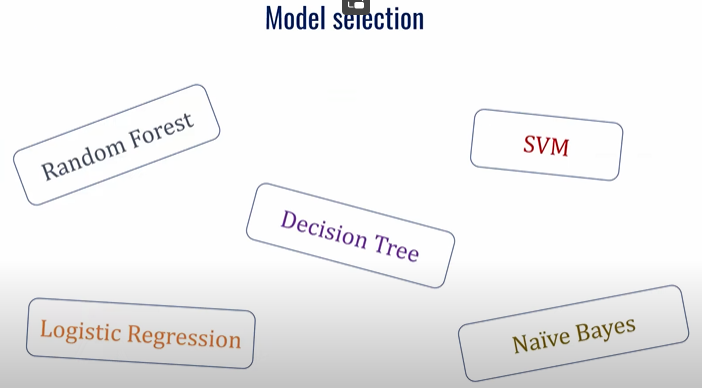

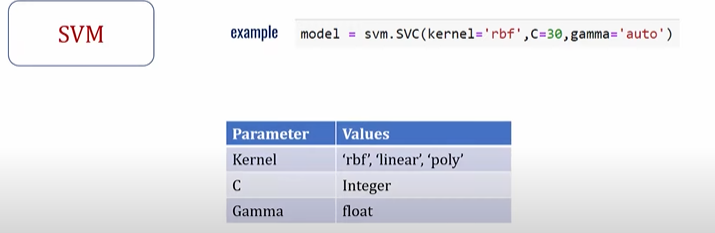

In [1]:
from sklearn import svm, datasets
iris = datasets.load_iris()

In [2]:

import pandas as pd

In [3]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)

In [4]:
df['flower'] = iris.target

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df['flower'] = df['flower'].apply(lambda x: iris.target_names[x])

In [7]:
df[47:150]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower
47,4.6,3.2,1.4,0.2,setosa
48,5.3,3.7,1.5,0.2,setosa
49,5.0,3.3,1.4,0.2,setosa
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Approach 1: Use train_test_split and manually tune parameters by trial and error

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [9]:
model = svm.SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

1.0

kernel='linear': specifies the kernel type to be used in the algorithm. In this case, a linear kernel is used, which means the algorithm will learn a linear decision boundary.

C=10: is the regularization parameter. It controls the trade-off between the margin (the distance between the decision boundary and the support vectors) and the misclassification error. A higher value of C means the algorithm will try to classify all training examples correctly, which can lead to overfitting.

gamma='auto': is the kernel coefficient for kernels other than linear. Since we're using a linear kernel, this parameter is ignored. However, for other kernels like RBF, poly, or sigmoid, gamma is used to determine the spread of the kernel.


Approach 2: Use K Fold Cross validation

In [12]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(svm.SVC(kernel='linear',C=10,gamma='auto'),iris.data, iris.target, cv=5) # 5 folds data

array([1.        , 1.        , 0.9       , 0.96666667, 1.        ])

In [14]:
cross_val_score(svm.SVC(kernel='rbf',C=10,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])

In [15]:
cross_val_score(svm.SVC(kernel='rbf',C=20,gamma='auto'),iris.data, iris.target, cv=5)

array([0.96666667, 1.        , 0.9       , 0.96666667, 1.        ])

Above approach is tiresome and very manual. We can use for loop as an alternative

In [16]:
import numpy as np

In [17]:
kernels = ['rbf','linear']
C = [1,10,20]
avg_scores = {}
for kval in kernels:
    for cval in C:
        cv_scores = cross_val_score(svm.SVC(kernel=kval,C=cval,gamma='auto'),iris.data, iris.target, cv=5)
        avg_scores[f'{kval}_{cval}'] = np.average(cv_scores)
avg_scores



{'rbf_1': np.float64(0.9800000000000001),
 'rbf_10': np.float64(0.9800000000000001),
 'rbf_20': np.float64(0.9666666666666668),
 'linear_1': np.float64(0.9800000000000001),
 'linear_10': np.float64(0.9733333333333334),
 'linear_20': np.float64(0.9666666666666666)}

In [20]:
best_score_params = np.max(list(avg_scores.values()))
print(best_score_params)

0.9800000000000001


In [22]:
best_score_params = max(avg_scores.values())
print(best_score_params)

0.9800000000000001


In [26]:
best_score_params = max(avg_scores.items())
print(best_score_params)
print(f'best_params: {best_score_params[0]}')

('rbf_20', np.float64(0.9666666666666668))
best_params: rbf_20


In [23]:
max_key, max_value = max(avg_scores.items(), key=lambda x: x[1])

In [24]:
print(max_key, max_value)

rbf_1 0.9800000000000001



Approach 3: Use GridSearchCV

GridSearchCV does exactly same thing as for loop above but in a single line of code

In [27]:

from sklearn.model_selection import GridSearchCV


In [41]:
gsc = GridSearchCV(svm.SVC(gamma='auto'),{
    'C': [1,10,20],
    'kernel': ['rbf', 'linear']
}, cv=5, return_train_score=False)


In [42]:
gsc.fit(iris.data, iris.target)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [1, 10, 20], 'kernel': ['rbf', 'linear']})

In [43]:
gsc.cv_results_

{'mean_fit_time': array([0.001299  , 0.00100207, 0.00090513, 0.00099797, 0.0008214 ,
        0.0008018 ]),
 'std_fit_time': array([7.59409825e-04, 6.37151302e-04, 4.93290578e-04, 6.80625540e-06,
        4.13618276e-04, 4.00948688e-04]),
 'mean_score_time': array([0.00121632, 0.00091419, 0.00060534, 0.00040236, 0.00081511,
        0.00091038]),
 'std_score_time': array([0.00040487, 0.00049893, 0.00049434, 0.00049283, 0.00040869,
        0.00050006]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value=999999),
 'param_kernel': masked_array(data=['rbf', 'linear', 'rbf', 'linear', 'rbf', 'linear'],
              mask=[False, False, False, False, False, False],
        fill_value=np.str_('?'),
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'linear'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'linear'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'li

In [29]:
df_gsc = pd.DataFrame(gsc.cv_results_)

In [30]:
df_gsc

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001712,0.000410,0.001203,0.000399,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
1,0.001596,0.000488,0.001203,0.000405,1,linear,"{'C': 1, 'kernel': 'linear'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
2,0.001600,0.000489,0.001598,0.000489,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.966667,1.0,0.966667,0.966667,1.0,0.980000,0.016330,1
3,0.001398,0.000488,0.001201,0.000402,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.966667,1.0,0.973333,0.038873,4
4,0.002303,0.001397,0.001201,0.000404,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.966667,1.0,0.900000,0.966667,1.0,0.966667,0.036515,5
5,0.001603,0.000806,0.000667,0.000558,20,linear,"{'C': 20, 'kernel': 'linear'}",1.000000,1.0,0.900000,0.933333,1.0,0.966667,0.042164,6


In [32]:
df_gsc[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.980000
1,1,linear,0.980000
2,10,rbf,0.980000
3,10,linear,0.973333
4,20,rbf,0.966667
5,20,linear,0.966667


In [33]:
gsc.best_params_

{'C': 1, 'kernel': 'rbf'}

In [34]:
gsc.best_score_

np.float64(0.9800000000000001)

In [35]:
dir(gsc)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_check_refit_for_multimetric',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_estimator_type',
 '_format_results',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_routed_params_for_fit',
 '_get_scorers',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_run

Use RandomizedSearchCV to reduce number of iterations and with random combination of parameters. This is useful when you have too many parameters to try and your training time is longer. It helps reduce the cost of computation

In [36]:
from sklearn.model_selection import RandomizedSearchCV

In [37]:
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
    'C': [1,10,20],
    'kernel': ['rbf', 'linear']
},
cv=5,
return_train_score=False,
n_iter=2
)

In [38]:
rs.fit(iris.data, iris.target)

RandomizedSearchCV(cv=5, estimator=SVC(gamma='auto'), n_iter=2,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']})

In [40]:
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,rbf,0.980000
1,20,rbf,0.966667


How about different models with different hyperparameters?

In [44]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
model_params = {
    'svm':{ # key
        'model': svm.SVC(gamma='auto'), # item
        'params': {                      # item
            'C': [1,10,20],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest':{
       'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10,100,500],
            'criterion': ['gini','entropy']
        }
    },
    'logistic_regression':{
       'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1,10,20]
        }
    }

}

In [ ]:
scores = []

for model_name, pm in model_params.items():  #for dict values
    clf = GridSearchCV(pm['model'], pm['params'], cv=5, return_train_score=False )
    clf.fit(iris.data, iris.target)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
d:\a27_YEARS_OLD\machine_learning\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:124

In [49]:
scores

[{'model': 'svm',
  'best_score': np.float64(0.9800000000000001),
  'best_params': {'C': 1, 'kernel': 'rbf'}},
 {'model': 'random_forest',
  'best_score': np.float64(0.9666666666666668),
  'best_params': {'criterion': 'gini', 'n_estimators': 500}},
 {'model': 'logistic_regression',
  'best_score': np.float64(0.9666666666666668),
  'best_params': {'C': 10}}]

In [48]:
df_clf = pd.DataFrame(scores, columns=['model','best_score','best_params'])
df_clf

,model,best_score,best_params
0,svm,0.980000,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.966667,"{'criterion': 'gini', 'n_estimators': 500}"
2,logistic_regression,0.966667,{'C': 10}


In [52]:
best_model_param = df_clf[df_clf['best_score'] == df_clf['best_score'].max()]

In [54]:
max_dataset = df_clf.sort_values('best_score', ascending=False).head(1)

In [53]:
best_model_param

,model,best_score,best_params
0,svm,0.98,"{'C': 1, 'kernel': 'rbf'}"


In [55]:
max_dataset

,model,best_score,best_params
0,svm,0.98,"{'C': 1, 'kernel': 'rbf'}"
